In [74]:
from scipy import stats

In [75]:
[k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)]

['ksone',
 'kstwo',
 'kstwobign',
 'norm',
 'alpha',
 'anglit',
 'arcsine',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'fisk',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'dgamma',
 'dweibull',
 'expon',
 'exponnorm',
 'exponweib',
 'exponpow',
 'fatiguelife',
 'foldcauchy',
 'f',
 'foldnorm',
 'weibull_min',
 'truncweibull_min',
 'weibull_max',
 'genlogistic',
 'genpareto',
 'genexpon',
 'genextreme',
 'gamma',
 'erlang',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'gompertz',
 'gumbel_r',
 'gumbel_l',
 'halfcauchy',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'gausshyper',
 'invgamma',
 'invgauss',
 'geninvgauss',
 'norminvgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'logistic',
 'loggamma',
 'loglaplace',
 'lognorm',
 'gibrat',
 'gilbrat',
 'maxwell',
 'mielke',
 'kappa4',
 'kappa3',
 'moyal',
 'nakagami',
 'ncx2',
 'ncf',
 't',
 'nct',
 'pareto',
 'lomax',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'p

In [76]:
[k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_discrete)]

['binom',
 'bernoulli',
 'betabinom',
 'nbinom',
 'geom',
 'hypergeom',
 'nhypergeom',
 'logser',
 'poisson',
 'planck',
 'boltzmann',
 'randint',
 'zipf',
 'zipfian',
 'dlaplace',
 'skellam',
 'yulesimon',
 'nchypergeom_fisher',
 'nchypergeom_wallenius']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


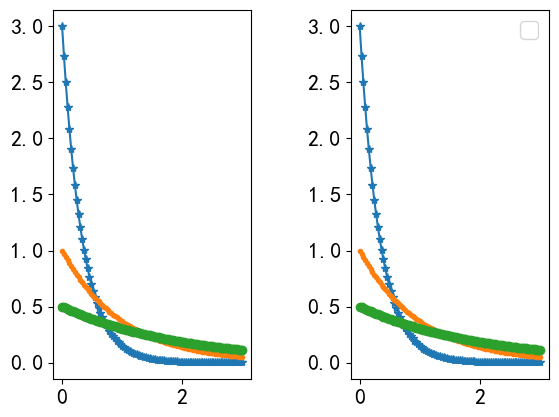

In [77]:
#程序文件ex9_1.py
from scipy.stats import expon, gamma
import pylab as plt

x = plt.linspace(0, 3, 100)
L = [1 / 3, 1, 2]
s1 = ['*-', '.-', 'o-']

plt.subplots_adjust(wspace=0.5)
plt.subplot(121)
for i in range(len(L)):
    plt.plot(x, gamma.pdf(x, 1, scale=L[i]), s1[i])

plt.subplot(122)
for i in range(len(L)):
    plt.plot(x, expon.pdf(x, scale=L[i]), s1[i])
plt.legend()
plt.show()

In [78]:
from scipy.stats import expon, gamma
import numpy as np
import plotly.express as px
import plotly.graph_objs as go

x = np.linspace(0, 3, 301)
L = [1 / 3, 1, 2]
# fig = px.scatter(x=x, y=[gamma.pdf(x, 1, scale=i) for i in L], labels="labels")
fig = go.Figure()
for i in L:
    fig.add_scatter(x=x, y=gamma.pdf(x, 1, scale=i), name=str(i))
fig

In [79]:
from scipy.stats import binom

n = 6
p = 0.3
x = np.arange(7)
x

array([0, 1, 2, 3, 4, 5, 6])

In [80]:
y = binom.pmf(x, n, p)
y

array([0.117649, 0.302526, 0.324135, 0.18522 , 0.059535, 0.010206,
       0.000729])

In [81]:
fig = go.Figure()
fig.add_scatter(x=x, y=y, mode="markers", marker=dict(size=50))
for i, j in zip(x, y):
    fig.add_shape(type="line", x0=i, y0=0, x1=i, y1=j)
fig

In [82]:
#程序文件ex9_3.py
from scipy.stats import norm
from scipy.optimize import fsolve

c1 = norm.ppf(0.25, 3, 2)  #求0.25分位数
fc = lambda c: 1 - norm.cdf(c, 3, 2) - 3 * norm.cdf(c, 3, 2)  #定义方程对应的匿名函数
c2 = fsolve(fc, 1)  #求初始值为1的方程零点
print('c1=', c1);
print('c2=', c2)

c1= 1.6510204996078366
c2= [1.6510205]


In [83]:
#程序文件ex9_4.py
from scipy.stats import expon

print(expon.stats(scale=3, moments='mvsk'))

(array(3.), array(9.), array(2.), array(6.))


In [84]:
#程序文件ex9_5.py
import numpy as np
import pandas as pd

a = pd.read_csv('data9_5.txt', header=None)
b = a.values  #DataFrame转换为array数组
mu = np.mean(b, axis=1)  #求均值
zw = np.median(b, axis=1)  #求中位数
jc = np.ptp(b, axis=1)  #求极差
fc = np.var(b, axis=1, ddof=1)  #求方差
bz = np.std(b, axis=1, ddof=1)  #求标准差
xf = np.cov(b)  #求协方差矩阵
xs = np.corrcoef(b)  #求相关系数矩阵
print(mu, zw, jc, fc, bz, xf, xs)

[73.03333333 78.9       ] [76.  82.5] [73 38] [250.10229885 128.50689655] [15.81462294 11.33608824] [[250.10229885 -32.65172414]
 [-32.65172414 128.50689655]] [[ 1.         -0.18213108]
 [-0.18213108  1.        ]]


In [85]:
#程序文件ex9_6.py
import pandas as pd

df = pd.read_csv('data9_5.txt', header=None)
df = df.T  #转置
print(df.describe())
print('-----\n偏度：\n', df.skew())
print('-----\n峰度：\n', df.kurt())
print('-----\n90%分位数：\n', df.quantile(0.9))

               0          1
count  30.000000  30.000000
mean   73.033333  78.900000
std    15.814623  11.336088
min    25.000000  56.000000
25%    65.500000  72.500000
50%    76.000000  82.500000
75%    79.750000  87.750000
max    98.000000  94.000000
-----
偏度：
 0   -0.921875
1   -0.651461
dtype: float64
-----
峰度：
 0    1.750678
1   -0.615689
dtype: float64
-----
90%分位数：
 0    90.5
1    91.1
Name: 0.9, dtype: float64


(array([ 1.,  2.,  7., 13.,  7.]), array([25. , 39.6, 54.2, 68.8, 83.4, 98. ]), <BarContainer object of 5 artists>)


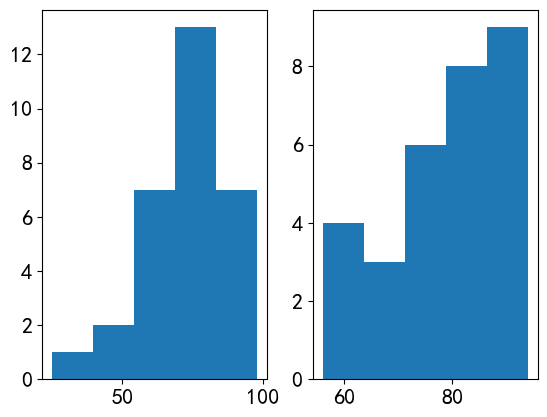

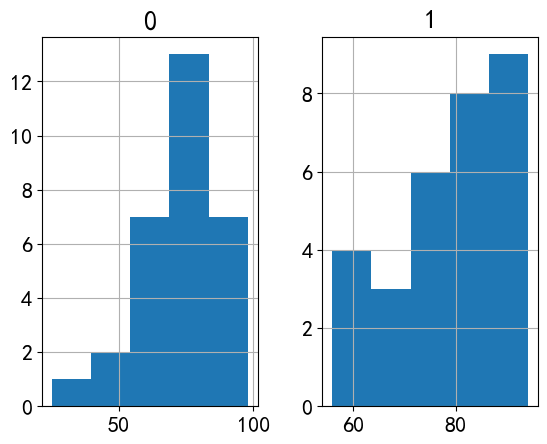

In [86]:
#程序文件ex9_7.py
import pandas as pd
import pylab as plt

df = pd.read_csv('data9_5.txt', header=None)
df = df.T  #转置
plt.subplot(121);
h1 = plt.hist(df[0], 5);
print(h1)
plt.subplot(122);
plt.hist(df[1], 5)
df.hist(bins=5)  #另一种方法画直方图
plt.show()


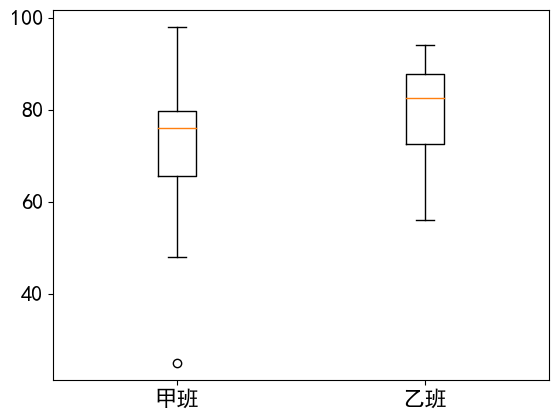

In [87]:
#程序文件ex9_8.py
import pandas as pd
import pylab as plt

df = pd.read_csv('data9_5.txt', header=None).T
plt.rc('font', family='SimHei');
plt.rc('font', size=16);
plt.boxplot(df, labels=['甲班', '乙班']);
plt.show()

(array([0.03333333, 0.03333333, 0.03333333, 0.1       , 0.2       ,
       0.33333333, 0.53333333, 0.76666667, 0.9       , 1.        ]), array([25. , 32.3, 39.6, 46.9, 54.2, 61.5, 68.8, 76.1, 83.4, 90.7, 98. ]), [<matplotlib.patches.Polygon object at 0x00000265275BA580>])


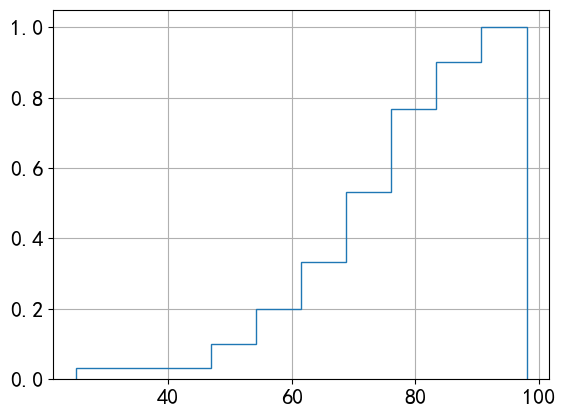

In [88]:
#程序文件ex9_9.py
import pandas as pd
import pylab as plt

df = pd.read_csv('data9_5.txt', header=None)
d = df.T[0]  #提取甲班成绩
plt.rc('font', family='SimHei');
plt.rc('font', size=16);
h = plt.hist(d, density=True, histtype='step', cumulative=True)
print(h);
plt.grid();
plt.show()

In [89]:
import plotly.express as px

px.histogram(data_frame=d, cumulative=True, )


In [90]:
x = np.linspace(0, 10, 11)
y = x
px.line(x=x, y=y, line_shape="hvh")

In [91]:
k = d.value_counts(bins=range(20, 110, 10), ascending=True)
k = k.cumsum()
k = np.append(k, 0)
k

array([ 0,  1,  3,  6,  9, 13, 18, 30,  0], dtype=int64)

In [92]:
px.line(x=range(20, 110, 10), y=k, line_shape="hv")

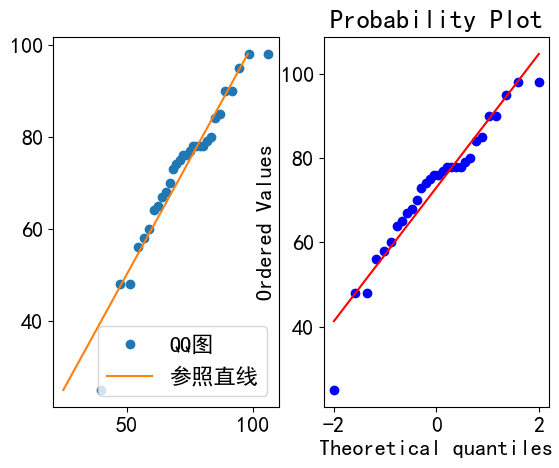

In [93]:
#程序文件ex9_10.py
import pandas as pd
import pylab as plt
from scipy.stats import norm, probplot

df = pd.read_csv('data9_5.txt', header=None)
d = df.values[0]  #提取甲班成绩
mu = d.mean();
s = d.std();
sd = sorted(d);
n = len(d)
x = (plt.arange(n) + 1 / 2) / n;
yi = norm.ppf(x, mu, s)
plt.rc('font', size=16);
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False)
plt.subplot(121);
plt.plot(yi, sd, 'o', label='QQ图')
plt.plot(sd, sd, label='参照直线');
plt.legend()
plt.subplot(122);
probplot(d, plot=plt);
plt.show()


In [94]:
#程序文件ex9_11.py
import numpy as np
from scipy.stats import t, sem

d = np.loadtxt('data9_11.txt')
d = d.flatten()
n = len(d)
xb = d.mean()
s = d.std(ddof=1)  #计算均值和标准差
sm = sem(d)  #计算样本均值的标准误差
a = 0.05;
ta = t.ppf(1 - a / 2, n - 1)
L = [xb - sm * ta, xb + sm * ta]
print(np.round(L, 4))

[500.4451 507.0549]


In [95]:
#程序文件ex9_12.py
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

alpha = 0.05;
sigma = 4.2
a = np.array([26.01, 26.00, 25.98, 25.86, 26.32, 25.58, 25.32, 25.89, 26.32, 26.18])
t, p = ztest(a, value=26)
xb = a.mean();
s = a.std(ddof=1)
z = t * s / sigma  #转换为z统计量
za = norm.ppf(1 - alpha / 2, 0, 1)  #求上alpha/2分位数
print('Z统计量值：', z);
print('p值：', p);
print('分位数：', za)


Z统计量值： -0.04065785563073785
p值： 0.5847910057871308
分位数： 1.959963984540054


In [96]:
#程序文件ex9_15.py
import scipy.stats as ss
import numpy as np

n1 = np.array([36, 40, 19, 2, 0, 2, 1])
f = np.arange(7)
lamda = n1 @ f / 100;
n = sum(n1)
p0 = ss.poisson.pmf(range(3), lamda)  #计算取值的概率
p = np.hstack([p0, 1 - sum(p0)])  #构造分布律
ex = n * p;
ob = np.hstack([n1[:3], sum(n1[3:])])  #计算期望频数和观测频数
kf1 = ss.chisquare(ob, ex, ddof=1).statistic
kf2 = sum(ob ** 2 / (n * p)) - n  #计算统计量的值
yz = ss.chi2.ppf(0.95, 2)  #临界值
print(kf1);
print(kf2)  #输出两种方法计算的统计量

1.4607074196299568
1.460707419629955


In [97]:
#程序文件ex9_16.py
import scipy.stats as ss
import numpy as np

t = np.array([100, 200, 300, np.inf])
p0 = ss.expon.cdf(t, scale=200)  #计算分布函数的取值
p0

array([0.39346934, 0.63212056, 0.77686984, 1.        ])

In [98]:
p = np.hstack([p0[0], np.diff(p0)])  #计算区间上的概率
p

array([0.39346934, 0.23865122, 0.14474928, 0.22313016])

In [99]:
ob = np.array([121, 78, 43, 58])
n = sum(ob);
ex = n * p
kf, p = ss.chisquare(ob, ex)  #输出统计量和概率值
p

0.6051928843800793

In [100]:
yz = ss.chi2.ppf(0.95, 3)  #临界值
print('检验统计量的值：', round(kf, 4))  #输出统计量值

检验统计量的值： 1.845


In [101]:
#程序文件ex9_17.py
import scipy.stats as ss
import numpy as np

f = open('data9_17.txt')
d = f.readlines();
d

['141  148  132  138  154  142  150  146  155  158\n',
 '150  140  147  148  144  150  149  145  149  158\n',
 '143  141  144  144  126  140  144  142  141  140\n',
 '145  135  147  146  141  136  140  146  142  137\n',
 '148  154  137  139  143  140  131  143  141  149\n',
 '148  135  148  152  143  144  141  143  147  146\n',
 '150  132  142  142  143  153  149  146  149  138\n',
 '142  149  142  137  134  144  146  147  140  142\n',
 '140  137  152  145\n']

In [102]:
a = []
for e in d: a.extend(e.split())
b = np.array([eval(e) for e in a])
b

array([141, 148, 132, 138, 154, 142, 150, 146, 155, 158, 150, 140, 147,
       148, 144, 150, 149, 145, 149, 158, 143, 141, 144, 144, 126, 140,
       144, 142, 141, 140, 145, 135, 147, 146, 141, 136, 140, 146, 142,
       137, 148, 154, 137, 139, 143, 140, 131, 143, 141, 149, 148, 135,
       148, 152, 143, 144, 141, 143, 147, 146, 150, 132, 142, 142, 143,
       153, 149, 146, 149, 138, 142, 149, 142, 137, 134, 144, 146, 147,
       140, 142, 140, 137, 152, 145])

In [103]:
xb = b.mean();
s = b.std(ddof=1)
st, p = ss.kstest(b, 'norm', (xb, s))
print('统计量：', round(st, 4));
print('p值', round(p, 4))
# 结果返回两个值：statistic → D值，pvalue → P值
# p值大于0.05，为正态分布

统计量： 0.0851
p值 0.5484


In [104]:
#程序文件ex9_18.py
import pandas as pd
import numpy as np
import statsmodels.api as sm

a = pd.read_excel('data9_18.xlsx', header=None)
b = a.values.T
y = b[~np.isnan(b)]
x = np.hstack([np.ones(5), np.full(4, 2), np.full(4, 3), np.full(3, 4)])
d = {'x': x, 'y': y}  #构造字典
model = sm.formula.ols('y~C(x)', d).fit()  #构建模型
anovat = sm.stats.anova_lm(model)  #进行单因素方差分析
anovat.apply(lambda x: round(x, 2))

,df,sum_sq,mean_sq,F,PR(>F)
C(x),3.0,60153.33,20051.11,3.73,0.04
Residual,12.0,64546.67,5378.89,NaN,NaN


In [105]:
#程序文件ex9_19.py
import numpy as np
from scipy.stats import f
import statsmodels.api as sm

d = np.loadtxt('data9_19.txt')
d

array([[55. , 58. , 57.4, 57.1],
       [54.4, 56.8, 52.4, 56. ],
       [54. , 54.1, 54.3, 54. ],
       [56.4, 57. , 56.6, 57. ],
       [56.1, 57. , 56.1, 54. ]])

In [106]:
mu = d.mean(axis=1)
mu

array([56.875, 54.9  , 54.1  , 56.75 , 55.8  ])

In [107]:
a = d.flatten()
a

array([55. , 58. , 57.4, 57.1, 54.4, 56.8, 52.4, 56. , 54. , 54.1, 54.3,
       54. , 56.4, 57. , 56.6, 57. , 56.1, 57. , 56.1, 54. ])

In [108]:
x = np.tile(np.arange(1, 6), (4, 1)).T.flatten()
x

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5])

In [109]:
d = {'x': x, 'y': a}  #构造求解需要的字典
m = sm.formula.ols("y~C(x)", d).fit()  #构建模型
s = sm.stats.anova_lm(m)  #进行单因素方差分析
fa = f.ppf(0.95, s.df[0], s.df[1])  #计算上alpha分位数
ts = sum(s.sum_sq)  #求总的偏差平方和
print(s);
print('临界值：', round(fa, 4))
print('总的偏差平方和：', round(ts, 4))

            df   sum_sq   mean_sq         F   PR(>F)
C(x)       4.0  22.7680  5.692000  3.949578  0.02199
Residual  15.0  21.6175  1.441167       NaN      NaN
临界值： 3.0556
总的偏差平方和： 44.3855


In [110]:
np.tile(np.arange(1, 6), (4, 1))

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [113]:
#程序文件ex9_20.py
import numpy as np
from scipy.stats import f
import statsmodels.api as sm

a = np.loadtxt('data9_20.txt')
x1 = np.tile(np.arange(1, 5), (3, 1)).T  #燃料水平
x2 = np.tile(np.arange(1, 4), (4, 1))  #推进器水平
d = {'x1': x1.flatten(), 'x2': x2.flatten(), 'y': a.flatten()}
m = sm.formula.ols('y~C(x1)+C(x2)', d).fit()
s = sm.stats.anova_lm(m);
s

,df,sum_sq,mean_sq,F,PR(>F)
C(x1),3.0,157.590000,52.530000,0.430586,0.738747
C(x2),2.0,223.846667,111.923333,0.917429,0.449118
Residual,6.0,731.980000,121.996667,NaN,NaN


In [115]:
#程序文件ex9_21.py
import numpy as np
from scipy.stats import f
import statsmodels.api as sm

a = np.loadtxt('data9_21.txt')
x1 = np.tile(np.arange(1, 5), (6, 1)).T
x2 = np.tile(np.array([1, 1, 2, 2, 3, 3]), (4, 1))
d = {'x1': x1.flatten(), 'x2': x2.flatten(), 'y': a.flatten()}
m = sm.formula.ols('y~C(x1)*C(x2)', d).fit()
s = sm.stats.anova_lm(m);
s

,df,sum_sq,mean_sq,F,PR(>F)
C(x1),3.0,261.675000,87.225000,4.417388,0.025969
C(x2),2.0,370.980833,185.490417,9.393902,0.003506
C(x1):C(x2),6.0,1768.692500,294.782083,14.928825,0.000062
Residual,12.0,236.950000,19.745833,NaN,NaN
